# EDA

## Required Libraries

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Dataset

In [9]:
crime=pd.read_csv('police_department_data.csv')

In [10]:
crime

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212120,"(37.775420706711, -122.403404791479)"
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212168,"(37.775420706711, -122.403404791479)"
2,141059263,WARRANTS,WARRANT ARREST,2016-04-25 14:59:00,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,14105926363010,"(37.7299809672996, -122.388856204292)"
3,160013662,NON-CRIMINAL,LOST PROPERTY,2016-01-05 23:50:00,TENDERLOIN,NONE,JONES ST / OFARRELL ST,16001366271000,"(37.7857883766888, -122.412970537591)"
4,160002740,NON-CRIMINAL,LOST PROPERTY,2016-01-01 00:30:00,MISSION,NONE,16TH ST / MISSION ST,16000274071000,"(37.7650501214668, -122.419671780296)"
...,...,...,...,...,...,...,...,...,...
150495,161061000,ASSAULT,BATTERY,2016-12-30 21:01:00,PARK,NONE,OAK ST / STANYAN ST,16106100004134,"(37.7714278595913, -122.453981622365)"
150496,176000742,NON-CRIMINAL,LOST PROPERTY,2016-12-30 08:00:00,CENTRAL,NONE,JACKSON ST / SANSOME ST,17600074271000,"(37.7966261239618, -122.401857374739)"
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,2016-12-29 20:00:00,CENTRAL,NONE,PINE ST / TAYLOR ST,17600075806372,"(37.7906727649886, -122.41226909106)"
150498,176000764,LARCENY/THEFT,GRAND THEFT OF PROPERTY,2016-12-30 10:00:00,CENTRAL,NONE,200 Block of STOCKTON ST,17600076406374,"(37.7882745285785, -122.406658711008)"


In [11]:
crime.head()

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212120,"(37.775420706711, -122.403404791479)"
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212168,"(37.775420706711, -122.403404791479)"
2,141059263,WARRANTS,WARRANT ARREST,2016-04-25 14:59:00,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,14105926363010,"(37.7299809672996, -122.388856204292)"
3,160013662,NON-CRIMINAL,LOST PROPERTY,2016-01-05 23:50:00,TENDERLOIN,NONE,JONES ST / OFARRELL ST,16001366271000,"(37.7857883766888, -122.412970537591)"
4,160002740,NON-CRIMINAL,LOST PROPERTY,2016-01-01 00:30:00,MISSION,NONE,16TH ST / MISSION ST,16000274071000,"(37.7650501214668, -122.419671780296)"


In [5]:
# pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [17]:
crime['location']=crime['location'].apply(lambda s: list(ast.literal_eval(s)))

In [103]:
# Handling Latitude and Longitude data
import ast
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")
# Latitude & Longitude input
Latitude = [i[0] for i in crime['location']]
Longitude = [j[1] for j in crime['location']]
location = geolocator.reverse(str(m[0] for m in Latitude)+","+str(n[0] for n in Latitude))
# Display
print(location)

ValueError: Must be a coordinate pair or Point

In [110]:
str([m[0] for m in Latitude])

TypeError: 'float' object is not subscriptable

In [109]:
type(Latitude[0])

float

In [29]:
geolocator = Nominatim(user_agent="geoapiExercises")

In [30]:
crime.head(1)

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212120,"[37.775420706711, -122.403404791479]"


1495, Shafter Avenue, Bayview District, San Francisco, San Francisco City and County, San Francisco, California, 94188, United States


In [5]:
# Category of Crime
crime['crime_date']=pd.to_datetime(crime['crime_date'])

In [6]:
crime['Dates-year']=crime['crime_date'].dt.year
crime['Dates-month']=crime['crime_date'].dt.month
crime['Dates-day']=crime['crime_date'].dt.day
crime['Dates-hour']=crime['crime_date'].dt.hour
crime['Dates-minute']=crime['crime_date'].dt.minute
crime['Dates-second']=crime['crime_date'].dt.second
print(crime.shape)
crime[['Dates-year','Dates-month','Dates-day','Dates-hour','Dates-minute','Dates-second']].head()

(150500, 15)


,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2016,1,29,11,0,0
1,2016,1,29,11,0,0
2,2016,4,25,14,59,0
3,2016,1,5,23,50,0
4,2016,1,1,0,30,0


ValueError: not enough values to unpack (expected 6, got 2)

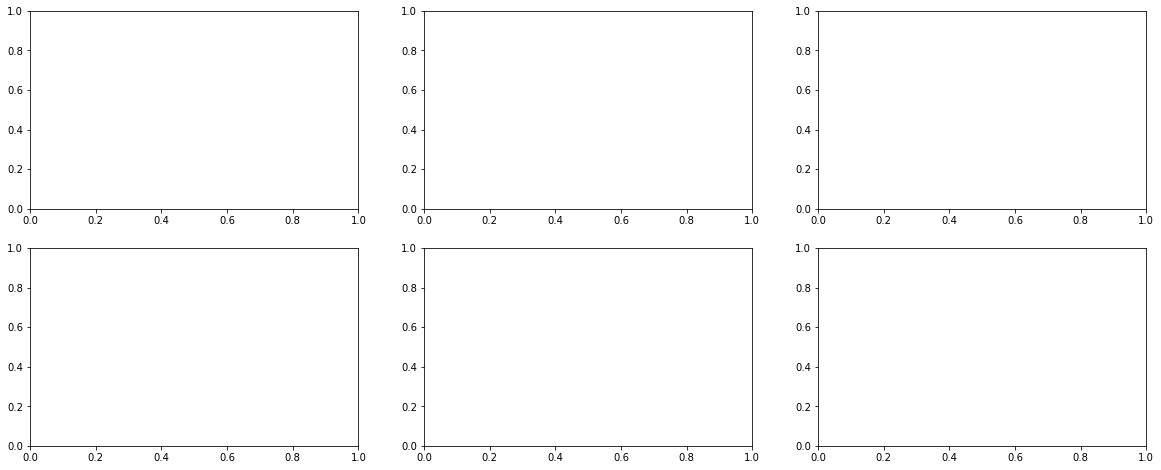

In [7]:
f,(ax1,ax2,ax3,ax4,ax5,ax6)= plt.subplots(2,3,figsize=(20,8))

sns.countplot(data='crime',x=crime['Dates-year'],ax=ax1)
sns.countplot(data='crime',x=crime['Dates-month'],ax=ax2)
sns.countplot(data='crime',x=crime['Dates-day'],ax=ax3)
sns.countplot(data='crime',x=crime['Dates-hour'],ax=ax4)
sns.countplot(data='crime',x=crimecrime['Dates-minute'],ax=ax5)
sns.countplot(data='crime',x=crime['Dates-second'],ax=ax6)


In [ ]:
#Missing/Duplicate values
#No missing values were identified in the training or test datasets

In [ ]:
crime.info()

In [14]:
crime[crime.duplicated()]

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second


In [19]:
crime.groupby('category')[]

40409

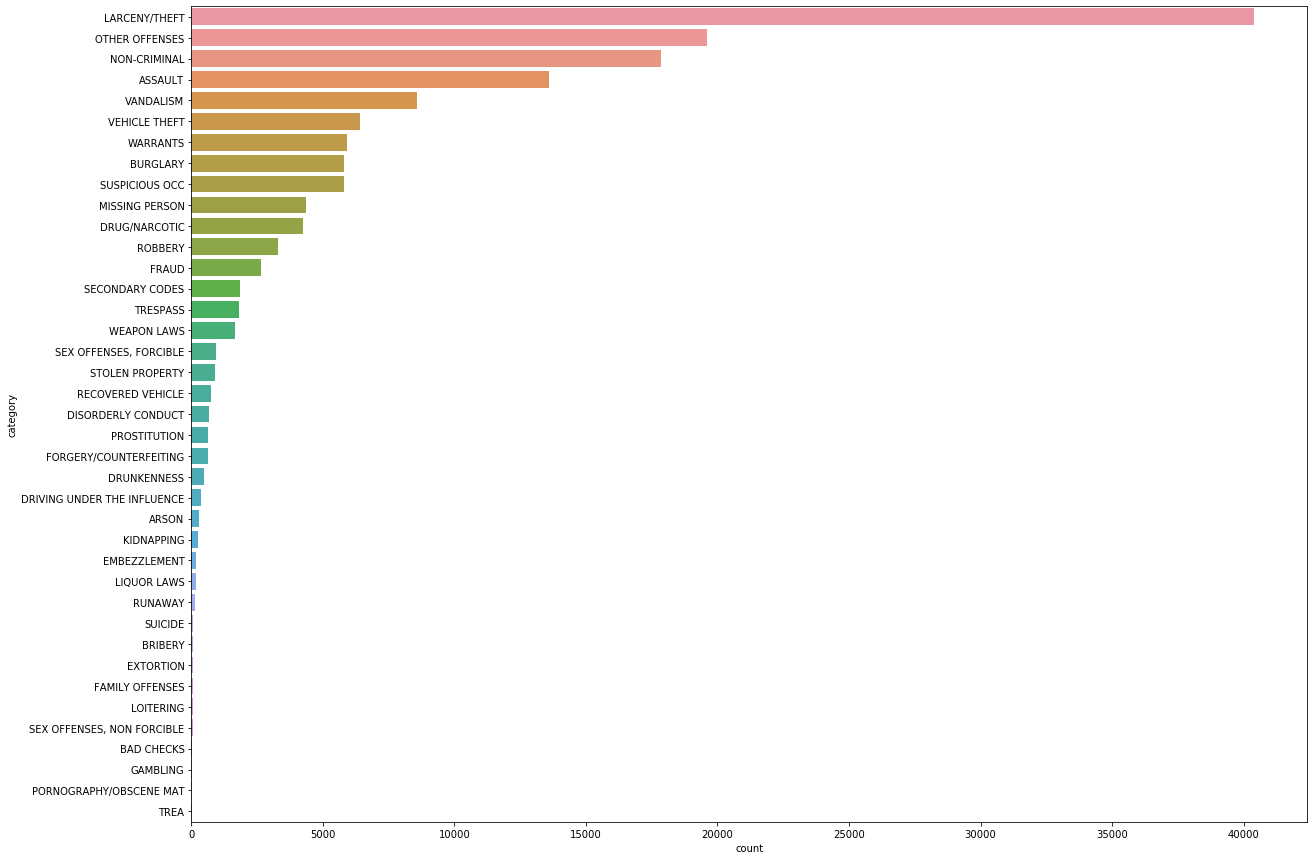

In [40]:
plt.figure(figsize=(20,15))
sns.countplot(y=crime['category'],order=crime['category'].value_counts().index[:])

In [7]:
crime.groupby('location')

In [53]:
crime['department_district'].value_counts()

SOUTHERN      28445
NORTHERN      20100
MISSION       19503
CENTRAL       17666
BAYVIEW       14303
INGLESIDE     11594
TARAVAL       11325
TENDERLOIN     9942
RICHMOND       8922
PARK           8699
Name: department_district, dtype: int64

In [87]:
crime['address']=crime['address'].apply(lambda x: x.replace('of','/'))
crime['area']=crime['address'].apply(lambda x: x.split('/')[1])

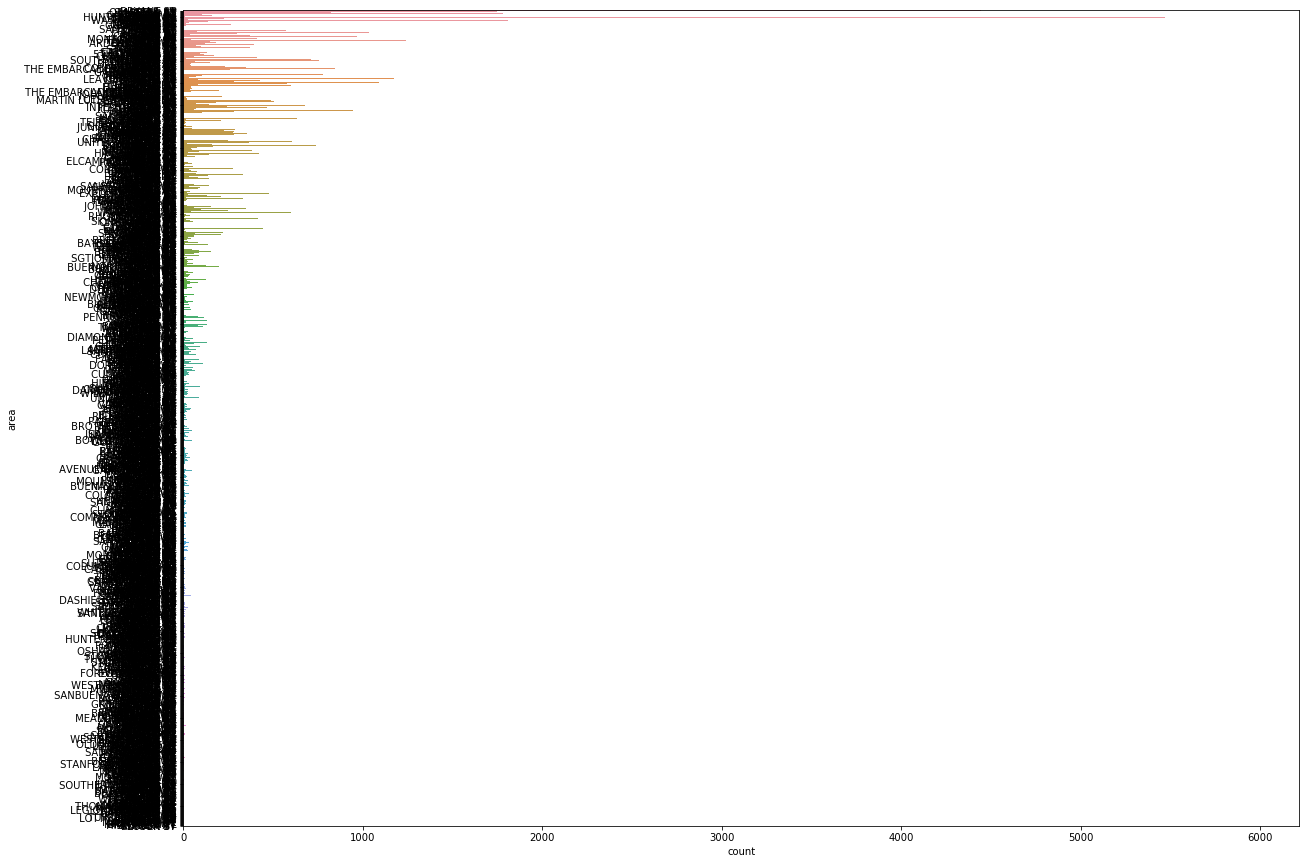

In [88]:
# crime['area']
plt.figure(figsize=(20,15))
sns.countplot(y=crime['area'])


In [80]:
crime['area'].value_counts()

 MISSION ST    5921
 MARKET ST     5472
 BRYANT ST     4445
 3RD ST        2002
 FOLSOM ST     1809
               ... 
 BERWICK PL       1
 WHITE ST         1
 MONETA CT        1
 CHAPMAN ST       1
 MONO ST          1
Name: area, Length: 1668, dtype: int64

In [71]:
crime['address'].head(5)

0     800 Block / BRYANT ST
1     800 Block / BRYANT ST
2     KEITH ST / SHAFTER AV
3    JONES ST / OFARRELL ST
4      16TH ST / MISSION ST
Name: address, dtype: object

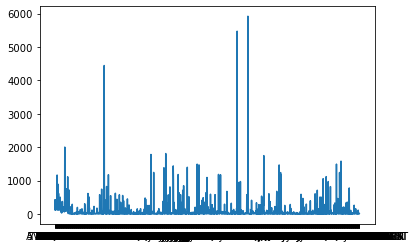

In [86]:
plt.plot(crime.groupby('area')['category'].count())